In [1]:
#import librairies


import streamlit as st
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn


In [2]:
df = pd.read_csv("RENDEMENT.csv", sep=';')

In [3]:
df.head()

,region,culture,Date,Production en tonne,Superficie en ha,Rendement kg/ha
0,DAKAR,ARACHIDE,2017,1884.493889,3140.823149,764.142857
1,DAKAR,ARACHIDE,2018,55.762016,371.746770,150.000000
2,DAKAR,ARACHIDE,2019,80.000000,400.000000,200.000000
3,DAKAR,ARACHIDE,2020,556.529307,894.741651,622.000000
4,DAKAR,ARACHIDE,2021,741.750042,1211.026408,612.497000


In [4]:
df.shape

(2187, 6)

In [5]:
df = df.rename({"region":"Region"}, axis=1)
df = df.rename({"culture":"Culture"}, axis=1)

In [6]:
df = df[df["Rendement kg/ha"].notnull()]

In [7]:
miss_values = df.isnull().sum()
print(miss_values)

Region                 0
Culture                0
Date                   0
Production en tonne    0
Superficie en ha       0
Rendement kg/ha        0
dtype: int64


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Date,Production en tonne,Superficie en ha,Rendement kg/ha
count,2168.000000,2168.000000,2168.000000,2168.000000
mean,2019.529520,32199.613841,18430.483786,2901.004506
std,1.709944,68375.616339,32072.586064,4446.395908
min,2017.000000,1.250000,2.766423,20.161290
25%,2018.000000,1243.000000,878.862264,733.500000
50%,2020.000000,7767.561713,5430.500000,1200.000000
75%,2021.000000,36240.331625,21500.000000,2402.095239
max,2022.000000,864504.181000,228684.795300,30000.000000


In [10]:
df['Region'].value_counts()


SEDHIOU                  48
REGION DE SEDHIOU        48
REGION DE KOLDA          47
KOLDA                    46
REGION DE TAMBACOUNDA    45
GOUDOMP                  45
BOUNKILING               45
TAMBACOUNDA              44
VELINGARA                43
REGION DE KAOLACK        42
REGION DE SAINT-LOUIS    42
BIGNONA                  42
KAOLACK                  42
ZIGUINCHOR               42
REGION DE ZIGUINCHOR     42
REGION DE FATICK         42
KAFFRINE                 42
FOUNDIOUGNE              42
REGION DE KAFFRINE       42
MEDINA YORO FOULA        41
NIORO DU RIP             41
FATICK                   41
DAGANA                   41
REGION DE MATAM          41
KOUNGHEUL                40
MALEM HODDAR             39
REGION DE KEDOUGOU       39
BIRKILANE                39
SARAYA                   39
REGION DE DIOURBEL       38
KOUPENTOUM               38
MBACKE                   38
SAINT-LOUIS              37
BAMBEY                   37
DIOURBEL                 37
REGION DE LOUGA     

In [11]:
df['Culture'].value_counts()


ARACHIDE    331
MAIS        321
NIEBE       315
SORGHO      314
MIL         302
MANIOC      300
RIZ         223
FONIO        62
Name: Culture, dtype: int64

C:\Users\AA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


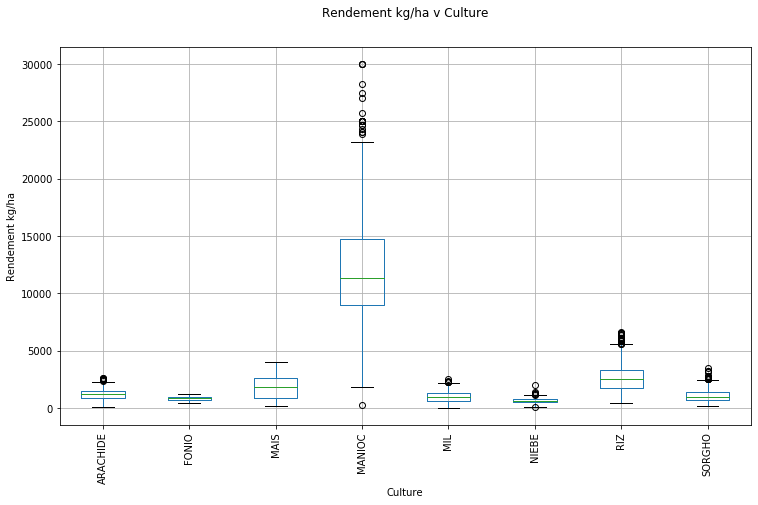

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Rendement kg/ha', 'Culture', ax=ax)
plt.suptitle('Rendement kg/ha v Culture')
plt.title('')
plt.ylabel('Rendement kg/ha')
plt.xticks(rotation=90)
plt.show()

In [13]:
df = df.rename({"Rendement kg/ha":"Rendement"}, axis=1)
df = df.rename({"Superficie en ha":"Superficie"}, axis=1)
df = df.rename({"Production en tonne":"Production"}, axis=1)

In [14]:
df.head()

,Region,Culture,Date,Production,Superficie,Rendement
0,DAKAR,ARACHIDE,2017,1884.493889,3140.823149,764.142857
1,DAKAR,ARACHIDE,2018,55.762016,371.746770,150.000000
2,DAKAR,ARACHIDE,2019,80.000000,400.000000,200.000000
3,DAKAR,ARACHIDE,2020,556.529307,894.741651,622.000000
4,DAKAR,ARACHIDE,2021,741.750042,1211.026408,612.497000


In [15]:
import seaborn as sns

C:\Users\AA\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


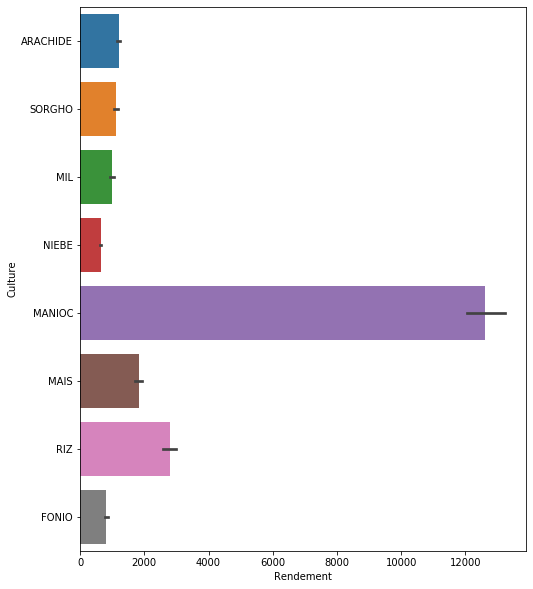

In [16]:
#rendement par culture

plt.figure(figsize=(8, 10))
sns.barplot(y=df['Culture'], x=df['Rendement'])

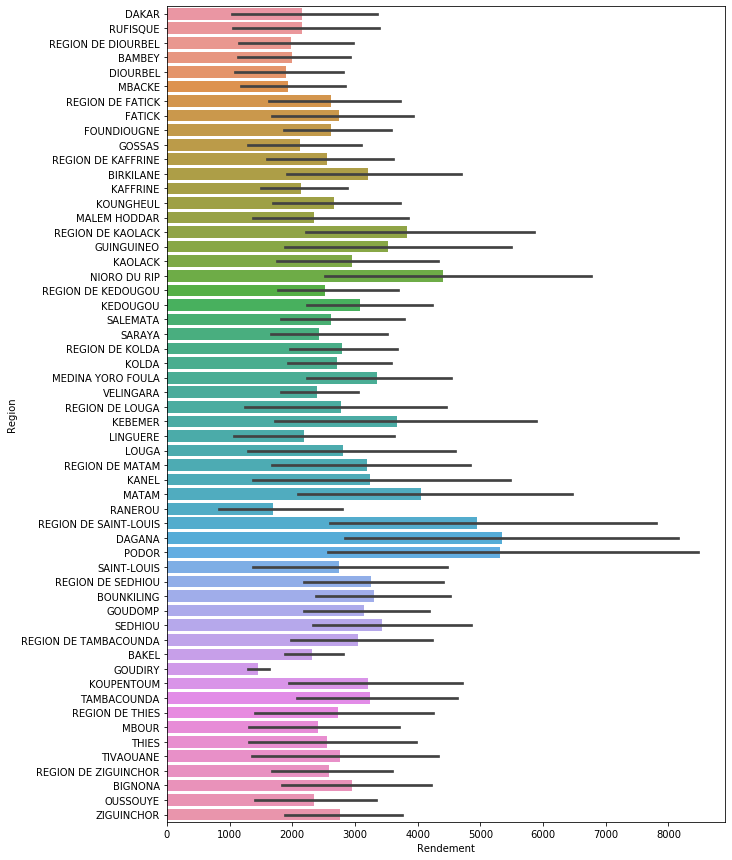

In [17]:
#rendement par culture

plt.figure(figsize=(10, 15))
sns.barplot(y=df['Region'], x=df['Rendement'])

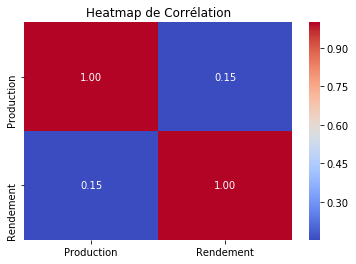

In [18]:
# corrélation entre la production et le rendement
correlation_matrix = df[['Production', 'Rendement']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Corrélation')
plt.show()

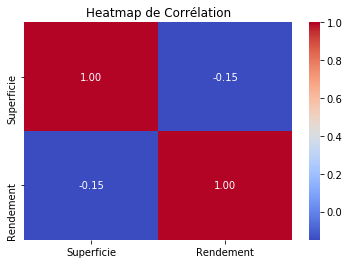

In [19]:
# corrélation entre la superficie et le rendement
correlation_matrix = df[['Superficie', 'Rendement']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Corrélation')
plt.show()

In [20]:
#On definit les variables du modele

x = df.drop("Rendement", axis=1)  #variables explicatives
y = df["Rendement"]               #variable expliquée

In [21]:
#libraries pour la regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
#division into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [24]:
print(x_train)

                     Region   Culture  Date    Production    Superficie
1150               LINGUERE     NIEBE  2019  33750.000000  45000.000000
387      REGION DE KAFFRINE       RIZ  2022    648.368235    440.284711
2008              TIVAOUANE     NIEBE  2019   9790.000000  22000.000000
1699  REGION DE TAMBACOUNDA       RIZ  2019   3721.899984   1437.096990
822                SALEMATA    SORGHO  2022   2270.929747   1234.200950
...                     ...       ...   ...           ...           ...
1656                SEDHIOU       MIL  2018  15410.463334   9833.000000
1110                KEBEMER       MIL  2018  11770.950000  36405.000000
1147               LINGUERE       MIL  2022  12642.763268  36645.690633
1312                RANEROU  ARACHIDE  2021   1552.632100   1819.157823
873                  SARAYA      MAIS  2018   9828.720000   3400.000000

[1734 rows x 5 columns]


In [25]:
#transformation des variables

ohe = OneHotEncoder(drop='first')    #pour encoder des variables nominales non ordinales
scale = StandardScaler()             #Utilisé pour normaliser les variables

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [2, 3, 4]),
            ('OHE', ohe, [0, 1]),
        ],
        remainder='passthrough'
)

In [26]:
x_train_encoder = preprocesser.fit_transform(x_train)
x_test_encoder = preprocesser.transform(x_test)

In [27]:
print(x_train_encoder)

  (0, 0)	-0.30858479737507066
  (0, 1)	0.044829024130470296
  (0, 2)	0.8558360420974939
  (0, 24)	1.0
  (0, 62)	1.0
  (1, 0)	1.4496387688301815
  (1, 1)	-0.4782243077875793
  (1, 2)	-0.5553408210785787
  (1, 37)	1.0
  (1, 63)	1.0
  (2, 0)	-0.30858479737507066
  (2, 1)	-0.33377339407891743
  (2, 2)	0.12744117595385326
  (2, 55)	1.0
  (2, 62)	1.0
  (3, 0)	-0.30858479737507066
  (3, 1)	-0.42965809107429176
  (3, 2)	-0.5237724321110866
  (3, 45)	1.0
  (3, 63)	1.0
  (4, 0)	1.4496387688301815
  (4, 1)	-0.45258550511084067
  (4, 2)	-0.5301980162040796
  (4, 50)	1.0
  (4, 64)	1.0
  :	:
  (1728, 61)	1.0
  (1729, 0)	-0.8946593194434881
  (1729, 1)	-0.24496199967667
  (1729, 2)	-0.2578797082361326
  (1729, 52)	1.0
  (1729, 61)	1.0
  (1730, 0)	-0.8946593194434881
  (1730, 1)	-0.3024715384715766
  (1730, 2)	0.583638047553816
  (1730, 19)	1.0
  (1730, 61)	1.0
  (1731, 0)	1.4496387688301815
  (1731, 1)	-0.288695636482924
  (1731, 2)	0.5912605615305453
  (1731, 24)	1.0
  (1731, 61)	1.0
  (1732, 0)	0.8

In [28]:
print(x_train)

                     Region   Culture  Date    Production    Superficie
1150               LINGUERE     NIEBE  2019  33750.000000  45000.000000
387      REGION DE KAFFRINE       RIZ  2022    648.368235    440.284711
2008              TIVAOUANE     NIEBE  2019   9790.000000  22000.000000
1699  REGION DE TAMBACOUNDA       RIZ  2019   3721.899984   1437.096990
822                SALEMATA    SORGHO  2022   2270.929747   1234.200950
...                     ...       ...   ...           ...           ...
1656                SEDHIOU       MIL  2018  15410.463334   9833.000000
1110                KEBEMER       MIL  2018  11770.950000  36405.000000
1147               LINGUERE       MIL  2022  12642.763268  36645.690633
1312                RANEROU  ARACHIDE  2021   1552.632100   1819.157823
873                  SARAYA      MAIS  2018   9828.720000   3400.000000

[1734 rows x 5 columns]


In [29]:
#importation de librairies suppl

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [30]:
#entrainement des differents modeles

models = {
    'lr':LinearRegression(),
    'Dtr':DecisionTreeRegressor(),
    'Rdf':RandomForestRegressor()
}
for name, md in models.items():
    md.fit(x_train_encoder,y_train)
    y_pred = md.predict(x_test_encoder)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 1015.4014367485277 score : 0.822697881720504
Dtr : mae : 375.1420644341421 score : 0.9222395423565853
Rdf : mae : 360.9876917409829 score : 0.933023458495064


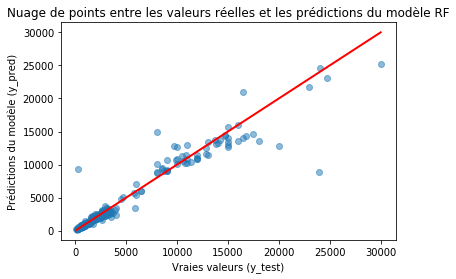

In [31]:
#visualisation des données apres apprentissage

plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Nuage de points entre les valeurs réelles et les prédictions du modèle RF')
plt.xlabel('Vraies valeurs (y_test)')
plt.ylabel('Prédictions du modèle (y_pred)')

# Ajouter une ligne de tendance (diagonale)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.show()

In [32]:
#selection du modele de random forest 

Rdf = RandomForestRegressor()
Rdf.fit(x_train_encoder,y_train)
y_pred_rdf=Rdf.predict(x_test_encoder)


In [33]:
print(f"mae : {mean_absolute_error(y_test,y_pred_rdf)} score : {r2_score(y_test,y_pred_rdf)}")

mae : 354.4468210020434 score : 0.9362570384573013


In [34]:
# test de la prediction avec de nouvelles valeures

X = np.array([["DAKAR", 'ARACHIDE', 2023 , 12000 , 200 ]])

In [35]:
print(X)

[['DAKAR' 'ARACHIDE' '2023' '12000' '200']]


In [36]:
X_essai_Rdf= preprocesser.transform(X)

C:\Users\AA\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\AA\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"


In [39]:
y_essai_Rdf=Rdf.predict(X_essai_Rdf)

In [40]:
print(y_essai_Rdf)

[2343.49134134]


In [41]:
#sauvegarde du modele dans un fichier joblib

import joblib


In [42]:

#creer un dictionnaire 

data = {"model": Rdf, "encoder": preprocesser}

#ouverture du fichier joblib contenant le dictionnaire

with open('saved_file_rendement.joblib', 'wb') as file:
    joblib.dump(data, file)

In [43]:
#verification de la sauvegarde

with open('saved_file_rendement.joblib', 'rb') as file:
           data = joblib.load(file)
    
Rdf_loaded = data["model"]    
preprocesser = data["encoder"]


In [44]:
#refaire la prediction
y_pred_reboot = Rdf_loaded.predict(X_essai_Rdf)
print(y_pred_reboot)

[2343.49134134]
